# PART OF THE TEMPLATE

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle

c:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "alphiree/cardiovascular-diseases-risk-prediction-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\cardiovascular-diseases-risk-prediction-dataset' already exists with files. Skipping download (replace=False).


In [3]:
files

['CVD_cleaned.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), delimiter=",")
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(308854, 19)

'Description'

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.00,308854.00,308854.00,308854.0,308854.00,308854.00,308854.00
mean,170.62,83.59,28.63,5.1,29.84,15.11,6.30
std,10.66,21.34,6.52,8.2,24.88,14.93,8.58
min,91.00,24.95,12.02,0.0,0.00,0.00,0.00
25%,163.00,68.04,24.21,0.0,12.00,4.00,2.00
50%,170.00,81.65,27.44,1.0,30.00,12.00,4.00
75%,178.00,95.25,31.85,6.0,30.00,20.00,8.00
max,241.00,293.02,99.33,30.0,120.00,128.00,128.00


'Duplicates'

np.int64(80)

,Data Types,Missing Values,Unique Values,Sample Values
General_Health,object,0,5,"[Fair, Very Good, Fair]"
Checkup,object,0,5,"[Within the past year, Within the past 2 years..."
Exercise,object,0,2,"[Yes, Yes, Yes]"
Heart_Disease,object,0,2,"[No, No, No]"
Skin_Cancer,object,0,2,"[No, No, Yes]"
Other_Cancer,object,0,2,"[No, No, No]"
Depression,object,0,2,"[No, No, No]"
Diabetes,object,0,4,"[No, No, No]"
Arthritis,object,0,2,"[No, No, No]"
Sex,object,0,2,"[Female, Female, Female]"


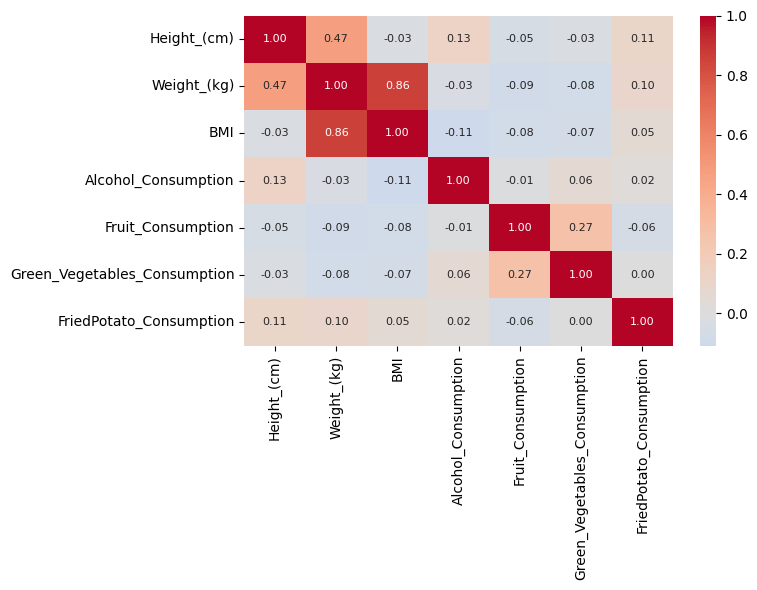

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0,
            annot_kws={"size": 8}, fmt='.2f')  # Kleinere Schrift + 2 Dezimalstellen
plt.tight_layout()
plt.show()

# ===========================================

# ===========================================

#  OWN PART BEGINS HERE

# Exploration of Data

## Imports

In [33]:
# =============================================================================
# CARDIOVASCULAR DISEASE RISK PREDICTION - EXPLORATORY DATA ANALYSIS
# Dataset: BRFSS 2021 CDC - Cardiovascular Diseases Risk Prediction Dataset
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("CARDIOVASCULAR DISEASE RISK PREDICTION - EDA")
print("Dataset: BRFSS 2021 CDC")
print("="*80)

CARDIOVASCULAR DISEASE RISK PREDICTION - EDA
Dataset: BRFSS 2021 CDC


## Load Data & Initial Inspection

In [36]:
# =============================================================================
# 1. DATA LOADING
# =============================================================================
print("\n" + "="*80)
print("DATA LOADING")
print("="*80)

# Load the dataset
csv_path = r'C:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\data\raw\cardiovascular-diseases-risk-prediction-dataset\CVD_cleaned.csv'
df = pd.read_csv(csv_path)

print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATA LOADING
Shape: 308,854 rows × 19 columns
Memory usage: 206.27 MB


## Dataset Information

In [37]:
# =============================================================================
# 2. BASIC DATASET INFORMATION
# =============================================================================
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)

print("\nColumn Names and Data Types:")
print("-"*80)
for idx, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{idx:2}. {col:30} | {str(dtype):15}")

print("\n" + "-"*80)
print("Dataset Info:")
print("-"*80)
df.info()


DATASET OVERVIEW

Column Names and Data Types:
--------------------------------------------------------------------------------
 1. General_Health                 | object         
 2. Checkup                        | object         
 3. Exercise                       | object         
 4. Heart_Disease                  | object         
 5. Skin_Cancer                    | object         
 6. Other_Cancer                   | object         
 7. Depression                     | object         
 8. Diabetes                       | object         
 9. Arthritis                      | object         
10. Sex                            | object         
11. Age_Category                   | object         
12. Height_(cm)                    | float64        
13. Weight_(kg)                    | float64        
14. BMI                            | float64        
15. Smoking_History                | object         
16. Alcohol_Consumption            | float64        
17. Fruit_Consumption  

## Data Type Correction & Feature Categorization

In [39]:
print("\n" + "="*80)
print("DATA TYPE CORRECTION & FEATURE CATEGORIZATION")
print("="*80)

# Convert binary categorical variables to category type
binary_cols = ['Heart_Disease', 'Smoking_History', 'Exercise', 'Diabetes', 
               'Arthritis', 'Sex', 'Skin_Cancer', 'Other_Cancer', 'Depression']

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"{col:25} converted to category")

# Convert ordinal categorical variables
ordinal_cols = ['General_Health', 'Age_Category', 'Checkup']

for col in ordinal_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"{col:25} converted to category")

# Ensure numerical columns are numeric
numerical_cols = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 
                  'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"{col:25} ensured as numeric")



DATA TYPE CORRECTION & FEATURE CATEGORIZATION
Heart_Disease             converted to category
Smoking_History           converted to category
Exercise                  converted to category
Diabetes                  converted to category
Arthritis                 converted to category
Sex                       converted to category
Skin_Cancer               converted to category
Other_Cancer              converted to category
Depression                converted to category
General_Health            converted to category
Age_Category              converted to category
Checkup                   converted to category
BMI                       ensured as numeric
Alcohol_Consumption       ensured as numeric
Fruit_Consumption         ensured as numeric
Green_Vegetables_Consumption ensured as numeric
FriedPotato_Consumption   ensured as numeric


## Unique Values

In [40]:
# =============================================================================
# 4. UNIQUE VALUES VERIFICATION
# =============================================================================

print("\n" + "="*80)
print("UNIQUE VALUES VERIFICATION")
print("="*80)

print("\nUnique values per column:")
print("-"*80)

for col in df.columns:
    unique_count = df[col].nunique()
    print(f"\n{col} ({df[col].dtype}):")
    print(f"  Unique values: {unique_count}")
    
    # Show unique values for categorical columns or columns with few unique values
    if unique_count <= 20:
        unique_vals = df[col].unique()
        print(f"  Values: {unique_vals}")
    else:
        print(f"  Sample values: {df[col].unique()[:10]}")
        print(f"  ... and {unique_count - 10} more")


UNIQUE VALUES VERIFICATION

Unique values per column:
--------------------------------------------------------------------------------

General_Health (category):
  Unique values: 5
  Values: ['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
Categories (5, object): ['Excellent', 'Fair', 'Good', 'Poor', 'Very Good']

Checkup (category):
  Unique values: 5
  Values: ['Within the past 2 years', 'Within the past year', '5 or more years ago', 'Within the past 5 years', 'Never']
Categories (5, object): ['5 or more years ago', 'Never', 'Within the past 2 years', 'Within the past 5 years', 'Within the past year']

Exercise (category):
  Unique values: 2
  Values: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Heart_Disease (category):
  Unique values: 2
  Values: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Skin_Cancer (category):
  Unique values: 2
  Values: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Other_Cancer (category):
  Unique values: 2
  Values: ['No', 'Yes']

## Duplicates

In [41]:
# =============================================================================
# 5. DUPLICATE DETECTION
# =============================================================================
print("\n" + "="*80)
print("DUPLICATE DETECTION")
print("="*80)

# Check for exact duplicates
duplicate_count = df.duplicated().sum()
duplicate_pct = (duplicate_count / len(df)) * 100

print(f"\nExact Duplicates:")
print(f"  Total duplicates: {duplicate_count:,} ({duplicate_pct:.2f}%)")

if duplicate_count > 0:
    print(f"\nWarning: {duplicate_count:,} duplicate rows found!")
    
    # Show some duplicate examples
    duplicates = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
    print(f"\nFirst 10 duplicate rows:")
    print(duplicates.head(10))
    
    # Ask if duplicates should be removed
    print(f"\nRecommendation: Consider removing duplicates before analysis")
    print(f"   Code: df = df.drop_duplicates()")
else:
    print("\n✓ No duplicate rows found!")

# Check for duplicates in specific columns (e.g., if there's an ID column)
print("\n" + "-"*80)
print("Duplicate Analysis by Key Columns:")
print("-"*80)

# Check duplicates based on all features except target
feature_cols = [col for col in df.columns if col != 'Heart_Disease']
duplicate_features = df.duplicated(subset=feature_cols).sum()
duplicate_features_pct = (duplicate_features / len(df)) * 100

print(f"\nDuplicates based on all features (excluding target):")
print(f"  Count: {duplicate_features:,} ({duplicate_features_pct:.2f}%)")

if duplicate_features > 0:
    print(f"\n  Note: {duplicate_features:,} rows have identical features but may differ in Heart_Disease status")
    
    # Show distribution of Heart_Disease in duplicate feature rows
    dup_feature_mask = df.duplicated(subset=feature_cols, keep=False)
    dup_feature_df = df[dup_feature_mask]
    
    if len(dup_feature_df) > 0:
        print(f"\n  Heart Disease distribution in duplicate feature rows:")
        hd_dist = dup_feature_df['Heart_Disease'].value_counts()
        for status, count in hd_dist.items():
            print(f"    {status}: {count:,} ({count/len(dup_feature_df)*100:.1f}%)")


DUPLICATE DETECTION

Exact Duplicates:
  Total duplicates: 80 (0.03%)


First 10 duplicate rows:
       General_Health               Checkup Exercise Heart_Disease  \
131815      Excellent   5 or more years ago      Yes            No   
223439      Excellent   5 or more years ago      Yes            No   
156116      Excellent  Within the past year       No            No   
156119      Excellent  Within the past year       No            No   
96710       Excellent  Within the past year       No            No   
237817      Excellent  Within the past year       No            No   
158952      Excellent  Within the past year      Yes            No   
233071      Excellent  Within the past year      Yes            No   
13312       Excellent  Within the past year      Yes            No   
81777       Excellent  Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
131815          No           No         No       No       

## Missing Values

In [42]:
# =============================================================================
# 6. MISSING VALUES ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df)
    
    # Visualize missing values
    if len(missing_df) > 0:
        plt.figure(figsize=(12, 6))
        plt.barh(missing_df.index, missing_df['Percentage'], color='coral', edgecolor='black')
        plt.xlabel('Missing Percentage (%)')
        plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("\nNo missing values found in the dataset!")


MISSING VALUES ANALYSIS

No missing values found in the dataset!


## Target Variable


TARGET VARIABLE: HEART DISEASE

Heart Disease Distribution:
  No   : 283,883 (91.91%)
  Yes  : 24,971 (8.09%)


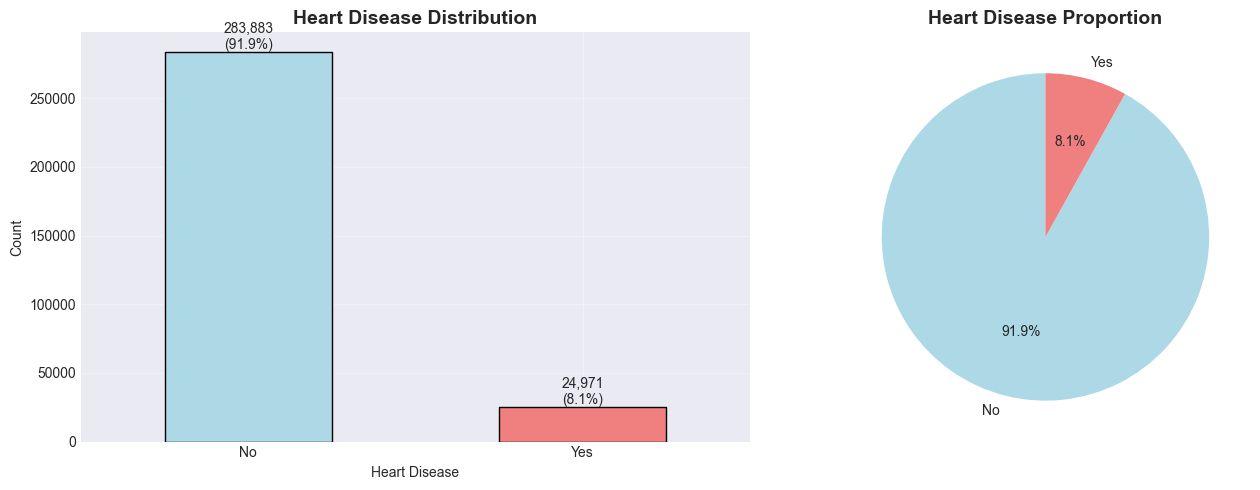

In [44]:
# =============================================================================
# 7. TARGET VARIABLE ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("TARGET VARIABLE: HEART DISEASE")
print("="*80)

target_dist = df['Heart_Disease'].value_counts()
print("\nHeart Disease Distribution:")
for category, count in target_dist.items():
    print(f"  {category:5}: {count:,} ({count/len(df)*100:.2f}%)")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_dist.plot(kind='bar', color=['lightblue', 'lightcoral'], edgecolor='black', ax=axes[0])
axes[0].set_title('Heart Disease Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(target_dist.values):
    axes[0].text(i, v, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', va='bottom')

# Pie chart
axes[1].pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', 
            colors=['lightblue', 'lightcoral'], startangle=90)
axes[1].set_title('Heart Disease Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Numerical Features


NUMERICAL FEATURES ANALYSIS

Numerical columns (7):
  - Height_(cm)
  - Weight_(kg)
  - BMI
  - Alcohol_Consumption
  - Fruit_Consumption
  - Green_Vegetables_Consumption
  - FriedPotato_Consumption

--------------------------------------------------------------------------------
Statistical Summary:
--------------------------------------------------------------------------------
       Height_(cm)  Weight_(kg)        BMI  Alcohol_Consumption  \
count    308854.00    308854.00  308854.00             308854.0   
mean        170.62        83.59      28.63                  5.1   
std          10.66        21.34       6.52                  8.2   
min          91.00        24.95      12.02                  0.0   
25%         163.00        68.04      24.21                  0.0   
50%         170.00        81.65      27.44                  1.0   
75%         178.00        95.25      31.85                  6.0   
max         241.00       293.02      99.33                 30.0   

       Fruit

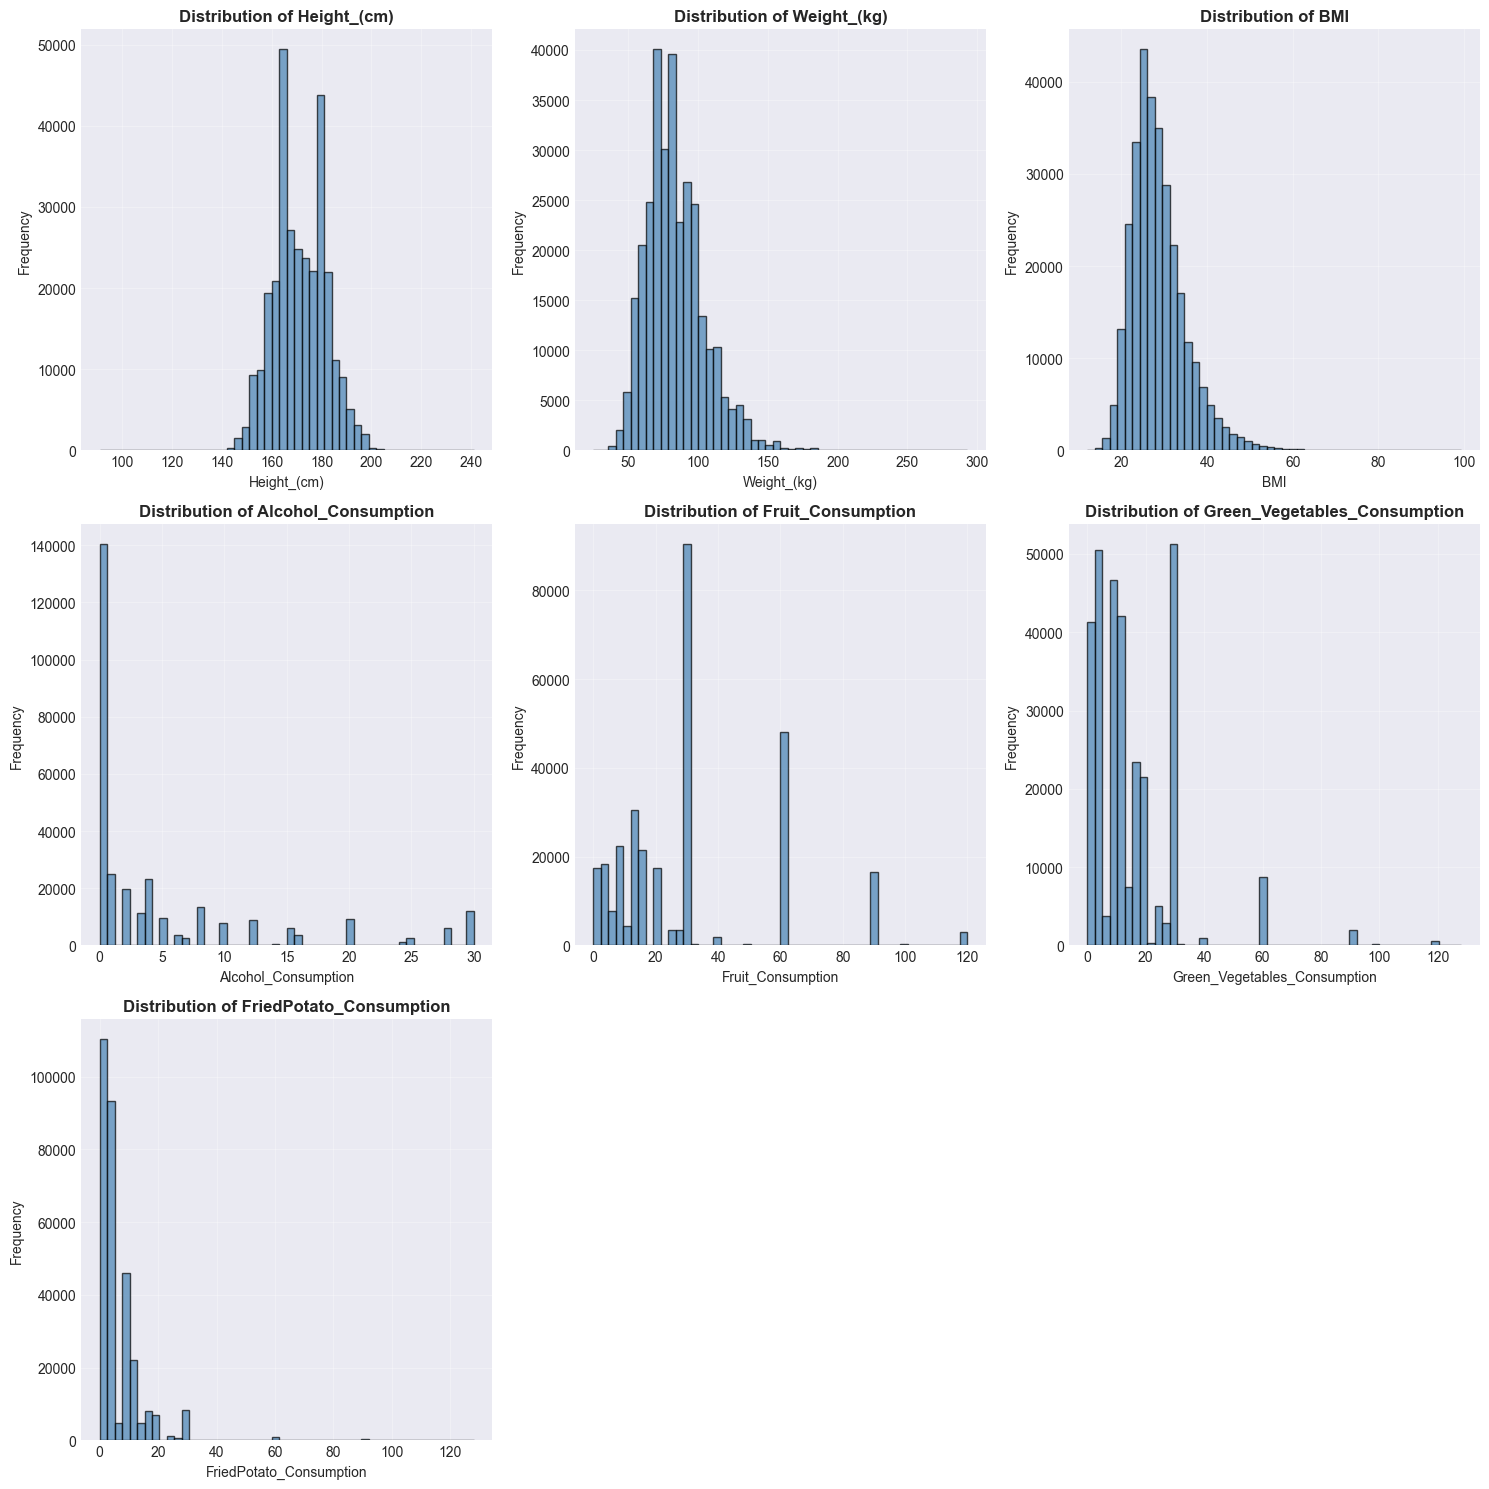

In [45]:
# =============================================================================
# 8. NUMERICAL FEATURES ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("NUMERICAL FEATURES ANALYSIS")
print("="*80)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

# Statistical summary
print("\n" + "-"*80)
print("Statistical Summary:")
print("-"*80)
print(df[numerical_cols].describe().round(2))

# Distribution plots for numerical features
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(df[col].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

## Categorical Features

In [46]:
# =============================================================================
# 9. CATEGORICAL FEATURES ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*80)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nCategorical columns ({len(categorical_cols)}):")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  - {col:30} | {unique_count:3} unique values")

# Value counts for each categorical feature
print("\n" + "-"*80)
print("Categorical Features Distribution:")
print("-"*80)

for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    for category, count in value_counts.items():
        print(f"  {str(category):30}: {count:,} ({count/len(df)*100:.1f}%)")


CATEGORICAL FEATURES ANALYSIS

Categorical columns (12):
  - General_Health                 |   5 unique values
  - Checkup                        |   5 unique values
  - Exercise                       |   2 unique values
  - Heart_Disease                  |   2 unique values
  - Skin_Cancer                    |   2 unique values
  - Other_Cancer                   |   2 unique values
  - Depression                     |   2 unique values
  - Diabetes                       |   4 unique values
  - Arthritis                      |   2 unique values
  - Sex                            |   2 unique values
  - Age_Category                   |  13 unique values
  - Smoking_History                |   2 unique values

--------------------------------------------------------------------------------
Categorical Features Distribution:
--------------------------------------------------------------------------------

General_Health:
  Very Good                     : 110,395 (35.7%)
  Good           

## Sex/Gender


SEX/GENDER ANALYSIS

Sex Distribution:
  Female    : 160,196 (51.9%)
  Male      : 148,658 (48.1%)

Heart Disease Prevalence by Sex:
  Female    : 9,898/160,196 = 6.2% have heart disease
  Male      : 15,073/148,658 = 10.1% have heart disease


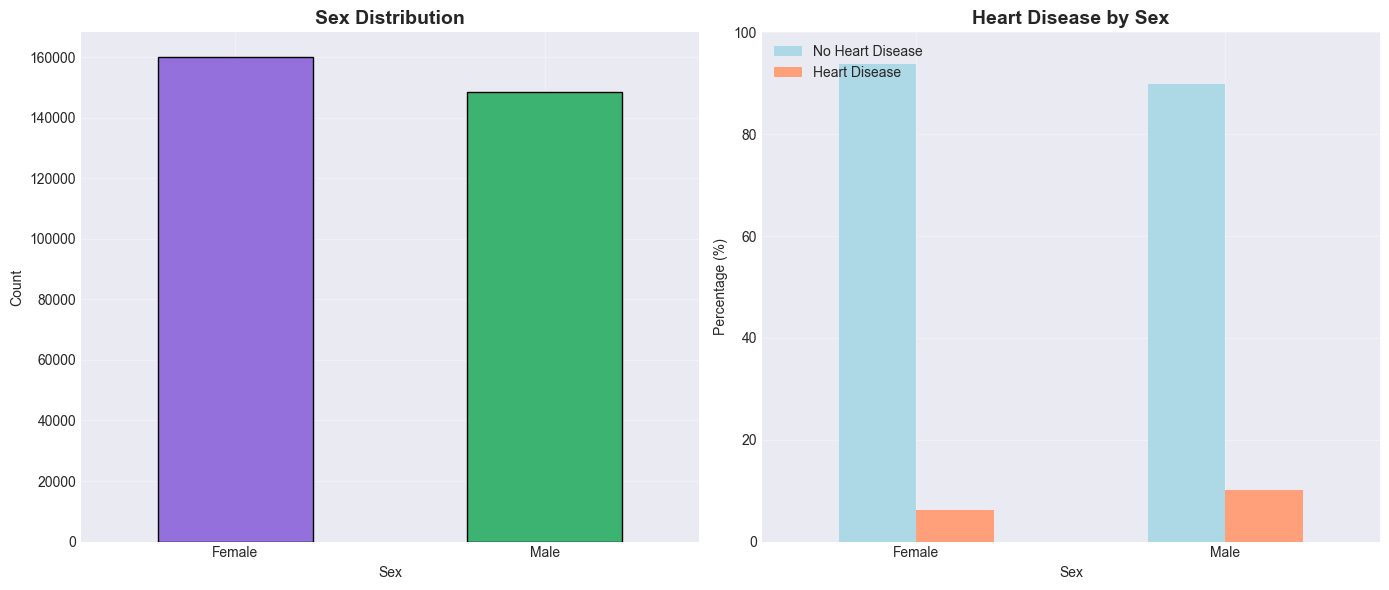

In [48]:
# =============================================================================
# 10. SEX/GENDER ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("SEX/GENDER ANALYSIS")
print("="*80)

# CRITICAL FIX: Reload data to get original Heart_Disease values
df_temp = pd.read_csv(csv_path)

# Convert Heart_Disease to numeric
if df_temp['Heart_Disease'].dtype == 'object' or df_temp['Heart_Disease'].dtype.name == 'category':
    df['Heart_Disease'] = df_temp['Heart_Disease'].map({'No': 0, 'Yes': 1})

sex_dist = df_temp['Sex'].value_counts()
print("\nSex Distribution:")
for sex, count in sex_dist.items():
    print(f"  {sex:10}: {count:,} ({count/len(df)*100:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sex distribution - Using purple/green color scheme
sex_dist.plot(kind='bar', color=['mediumpurple', 'mediumseagreen'], edgecolor='black', ax=axes[0])
axes[0].set_title('Sex Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3)

# Sex vs Heart Disease (ROBUST)
sex_heart_data = []

print("\nHeart Disease Prevalence by Sex:")
print("="*60)

for sex in df_temp['Sex'].unique():
    sex_mask = df_temp['Sex'] == sex
    sex_subset = df[sex_mask].copy()
    total = len(sex_subset)
    
    if total > 0:
        hd_yes = (sex_subset['Heart_Disease'] == 1).sum()
        hd_no = (sex_subset['Heart_Disease'] == 0).sum()
        
        hd_yes_pct = (hd_yes / total) * 100
        hd_no_pct = (hd_no / total) * 100
        
        sex_heart_data.append({
            'Sex': sex,
            'No Heart Disease': hd_no_pct,
            'Heart Disease': hd_yes_pct
        })
        
        print(f"  {sex:10}: {hd_yes:,}/{total:,} = {hd_yes_pct:.1f}% have heart disease")

print("="*60)

sex_heart_df = pd.DataFrame(sex_heart_data)
sex_heart_df.set_index('Sex', inplace=True)

sex_heart_df.plot(kind='bar', stacked=False, color=['lightblue', 'lightsalmon'], ax=axes[1])
axes[1].set_title('Heart Disease by Sex', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(['No Heart Disease', 'Heart Disease'], loc='upper left')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()

## Age


AGE CATEGORY ANALYSIS

Age Category Distribution:
  18-24          : 18,681 (6.0%)
  25-29          : 15,494 (5.0%)
  30-34          : 18,428 (6.0%)
  35-39          : 20,606 (6.7%)
  40-44          : 21,595 (7.0%)
  45-49          : 20,968 (6.8%)
  50-54          : 25,097 (8.1%)
  55-59          : 28,054 (9.1%)
  60-64          : 32,418 (10.5%)
  65-69          : 33,434 (10.8%)
  70-74          : 31,103 (10.1%)
  75-79          : 20,705 (6.7%)
  80+            : 22,271 (7.2%)

Heart Disease Prevalence by Age Category:
  70-74          : 4,561/31,103 = 14.7%
  60-64          : 3,012/32,418 = 9.3%
  75-79          : 3,752/20,705 = 18.1%
  80+            : 4,856/22,271 = 21.8%
  65-69          : 3,823/33,434 = 11.4%
  50-54          : 1,181/25,097 = 4.7%
  45-49          : 678/20,968 = 3.2%
  18-24          : 94/18,681 = 0.5%
  30-34          : 201/18,428 = 1.1%
  55-59          : 1,991/28,054 = 7.1%
  35-39          : 274/20,606 = 1.3%
  40-44          : 435/21,595 = 2.0%
  25-29      

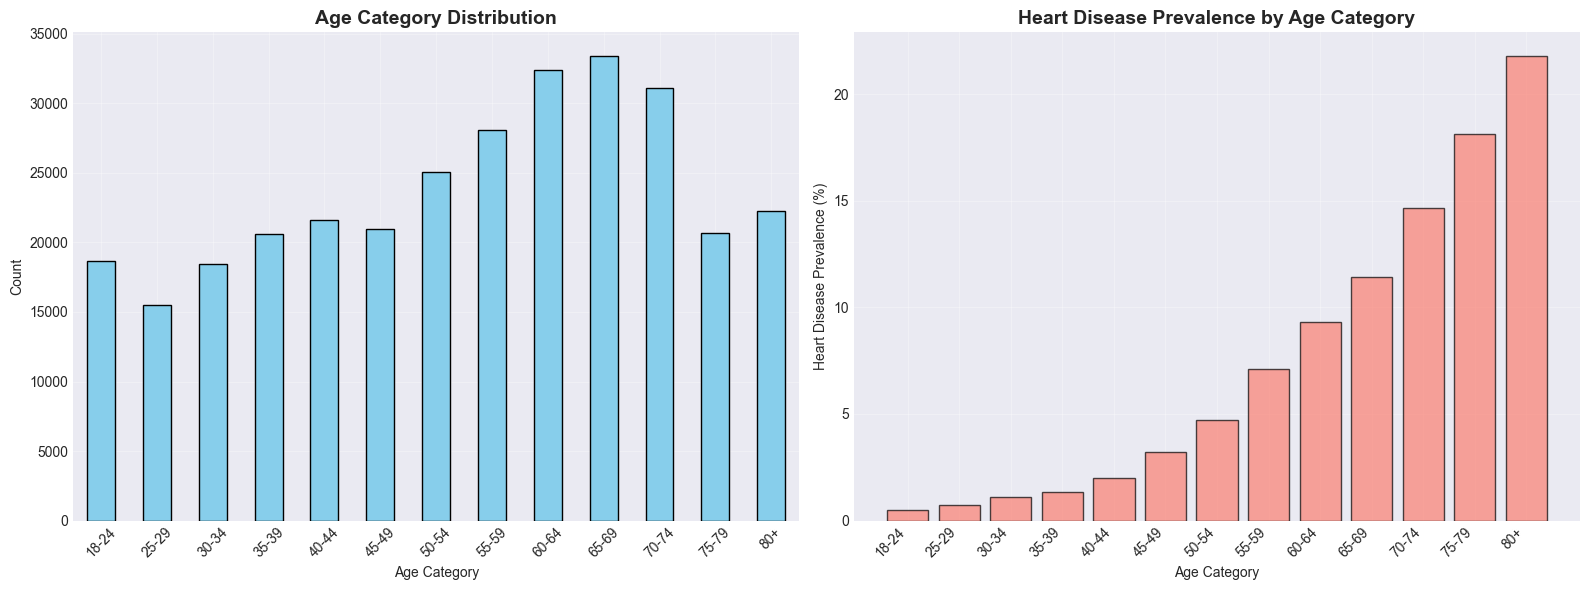

In [49]:
# =============================================================================
# 11. AGE CATEGORY ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("AGE CATEGORY ANALYSIS")
print("="*80)

age_dist = df['Age_Category'].value_counts().sort_index()
print("\nAge Category Distribution:")
for age, count in age_dist.items():
    print(f"  {age:15}: {count:,} ({count/len(df)*100:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age distribution
age_dist.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Age Category Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Age vs Heart Disease (ROBUST METHOD)
age_heart_data = []

print("\nHeart Disease Prevalence by Age Category:")
print("="*60)

for age_cat in df['Age_Category'].unique():
    age_mask = df['Age_Category'] == age_cat
    age_subset = df[age_mask].copy()
    total = len(age_subset)
    
    if total > 0:
        hd_yes = (age_subset['Heart_Disease'] == 1).sum()
        hd_prevalence = (hd_yes / total) * 100
        
        age_heart_data.append({
            'Age_Category': age_cat,
            'Prevalence': hd_prevalence
        })
        
        print(f"  {age_cat:15}: {hd_yes:,}/{total:,} = {hd_prevalence:.1f}%")

print("="*60)

# Sort by age order
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', 
             '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
age_heart_df = pd.DataFrame(age_heart_data)
age_heart_df['Age_Category'] = pd.Categorical(age_heart_df['Age_Category'], 
                                               categories=age_order, 
                                               ordered=True)
age_heart_df = age_heart_df.sort_values('Age_Category')

axes[1].bar(range(len(age_heart_df)), age_heart_df['Prevalence'].values, 
            color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(age_heart_df)))
axes[1].set_xticklabels(age_heart_df['Age_Category'].values, rotation=45, ha='right')
axes[1].set_title('Heart Disease Prevalence by Age Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age Category')
axes[1].set_ylabel('Heart Disease Prevalence (%)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## BMI


BMI ANALYSIS

BMI Statistics:
count    308854.000000
mean         28.626211
std           6.522323
min          12.020000
25%          24.210000
50%          27.440000
75%          31.850000
max          99.330000
Name: BMI, dtype: float64

BMI Category Distribution:
  Underweight    : 4,544 (1.5%)
  Normal         : 90,122 (29.2%)
  Overweight     : 109,644 (35.5%)
  Obese I        : 61,074 (19.8%)
  Obese II       : 25,810 (8.4%)
  Obese III      : 17,660 (5.7%)

Heart Disease Prevalence by BMI Category:
  Underweight    : 340/4,544 = 7.5%
  Normal         : 5,584/90,122 = 6.2%
  Overweight     : 9,001/109,644 = 8.2%
  Obese I        : 5,819/61,074 = 9.5%
  Obese II       : 2,525/25,810 = 9.8%
  Obese III      : 1,702/17,660 = 9.6%


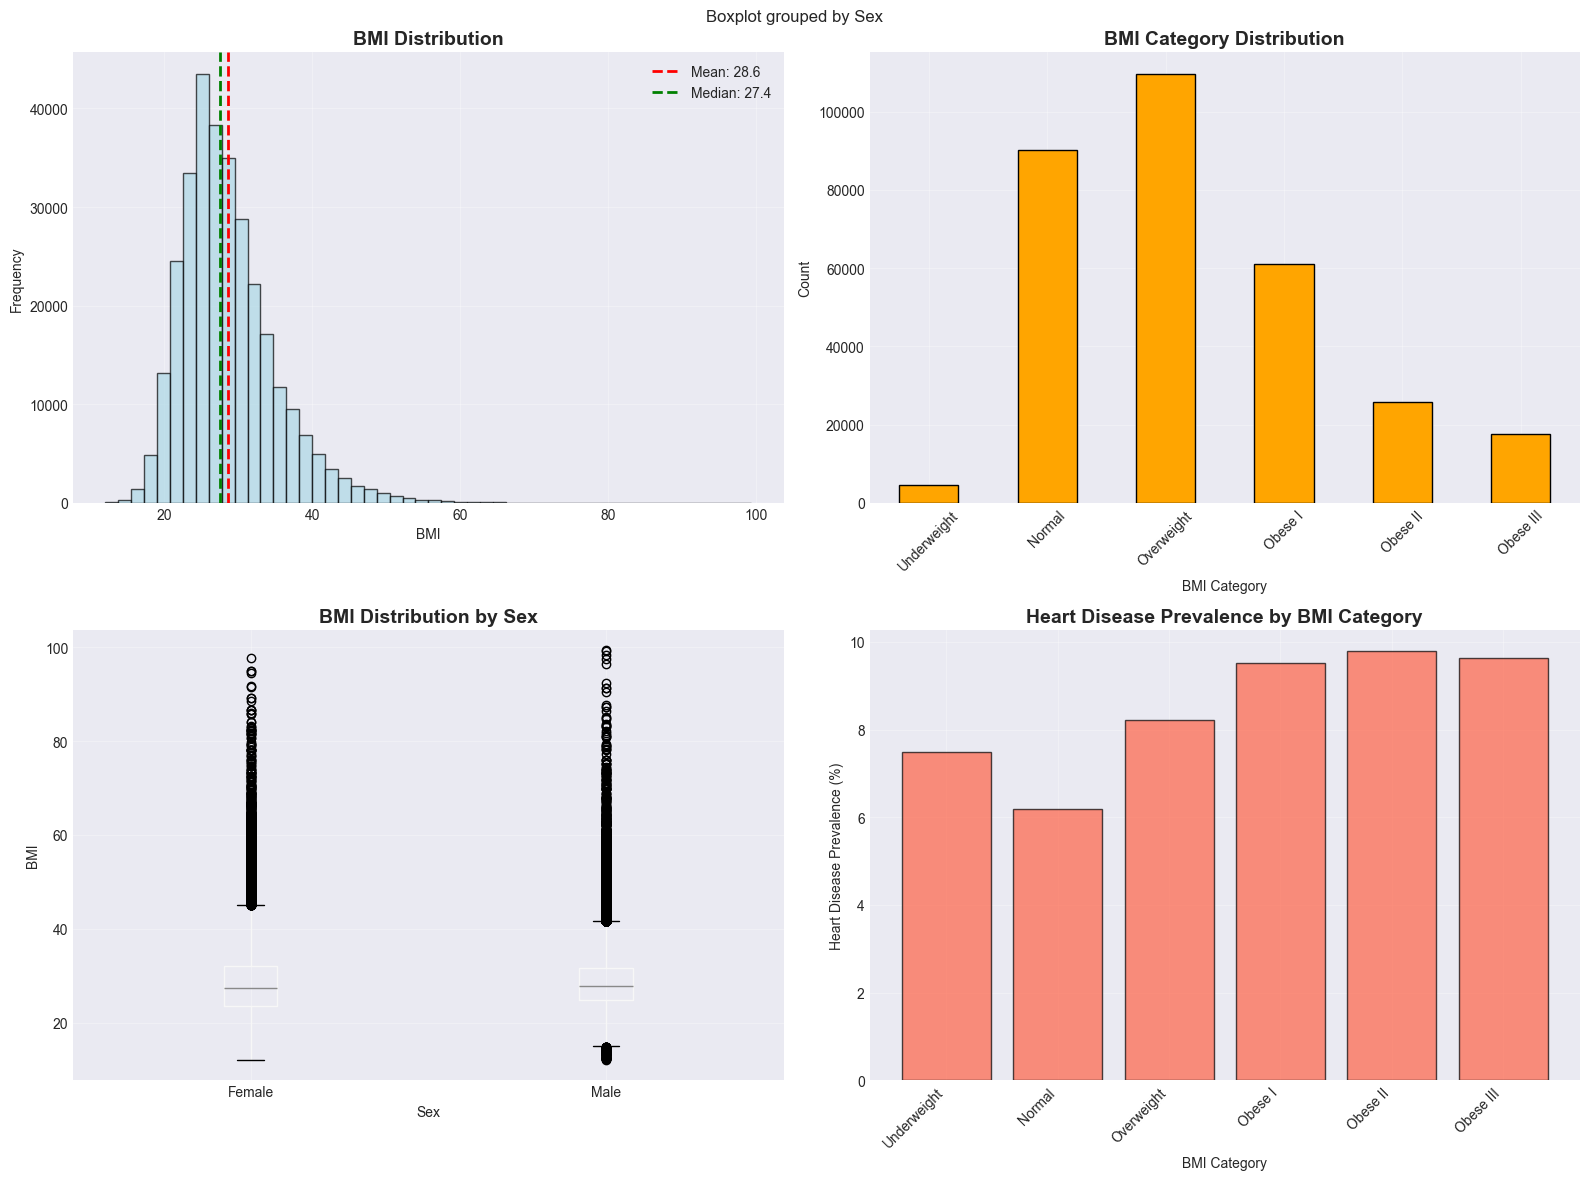

In [50]:
# =============================================================================
# 12. BMI ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("BMI ANALYSIS")
print("="*80)

bmi_stats = df['BMI'].describe()
print("\nBMI Statistics:")
print(bmi_stats)

# BMI categories (WHO classification)
df['BMI_Category'] = pd.cut(df['BMI'], 
                             bins=[0, 18.5, 25, 30, 35, 40, 100],
                             labels=['Underweight', 'Normal', 'Overweight', 
                                    'Obese I', 'Obese II', 'Obese III'])

bmi_cat_dist = df['BMI_Category'].value_counts().sort_index()
print("\nBMI Category Distribution:")
for cat, count in bmi_cat_dist.items():
    print(f"  {cat:15}: {count:,} ({count/len(df)*100:.1f}%)")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# BMI distribution
axes[0, 0].hist(df['BMI'].dropna(), bins=50, color='lightblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['BMI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["BMI"].mean():.1f}')
axes[0, 0].axvline(df['BMI'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["BMI"].median():.1f}')
axes[0, 0].set_title('BMI Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# BMI categories
bmi_cat_dist.plot(kind='bar', color='orange', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('BMI Category Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('BMI Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# BMI by Sex
df.boxplot(column='BMI', by='Sex', ax=axes[1, 0])
axes[1, 0].set_title('BMI Distribution by Sex', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('BMI')
plt.sca(axes[1, 0])
plt.xticks(rotation=0)
axes[1, 0].grid(True, alpha=0.3)

# BMI vs Heart Disease (ROBUST)
bmi_heart_data = []

print("\nHeart Disease Prevalence by BMI Category:")
print("="*60)

for bmi_cat in df['BMI_Category'].cat.categories:
    bmi_mask = df['BMI_Category'] == bmi_cat
    bmi_subset = df[bmi_mask].copy()
    total = len(bmi_subset)
    
    if total > 0:
        hd_yes = (bmi_subset['Heart_Disease'] == 1).sum()
        hd_prevalence = (hd_yes / total) * 100
        
        bmi_heart_data.append({
            'BMI_Category': bmi_cat,
            'Prevalence': hd_prevalence
        })
        
        print(f"  {bmi_cat:15}: {hd_yes:,}/{total:,} = {hd_prevalence:.1f}%")

print("="*60)

bmi_heart_df = pd.DataFrame(bmi_heart_data)

axes[1, 1].bar(range(len(bmi_heart_df)), bmi_heart_df['Prevalence'].values, 
               color='tomato', edgecolor='black', alpha=0.7)
axes[1, 1].set_xticks(range(len(bmi_heart_df)))
axes[1, 1].set_xticklabels(bmi_heart_df['BMI_Category'].values, rotation=45, ha='right')
axes[1, 1].set_title('Heart Disease Prevalence by BMI Category', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('BMI Category')
axes[1, 1].set_ylabel('Heart Disease Prevalence (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## General Health


GENERAL HEALTH STATUS ANALYSIS

General Health Distribution:
  Very Good      : 110,395 (35.7%)
  Good           : 95,364 (30.9%)
  Excellent      : 55,954 (18.1%)
  Fair           : 35,810 (11.6%)
  Poor           : 11,331 (3.7%)

Heart Disease Prevalence by General Health Status:
  Poor           : 3,602/11,331 = 31.8% have heart disease
  Fair           : 6,789/35,810 = 19.0% have heart disease
  Good           : 8,643/95,364 = 9.1% have heart disease
  Very Good      : 4,822/110,395 = 4.4% have heart disease
  Excellent      : 1,115/55,954 = 2.0% have heart disease


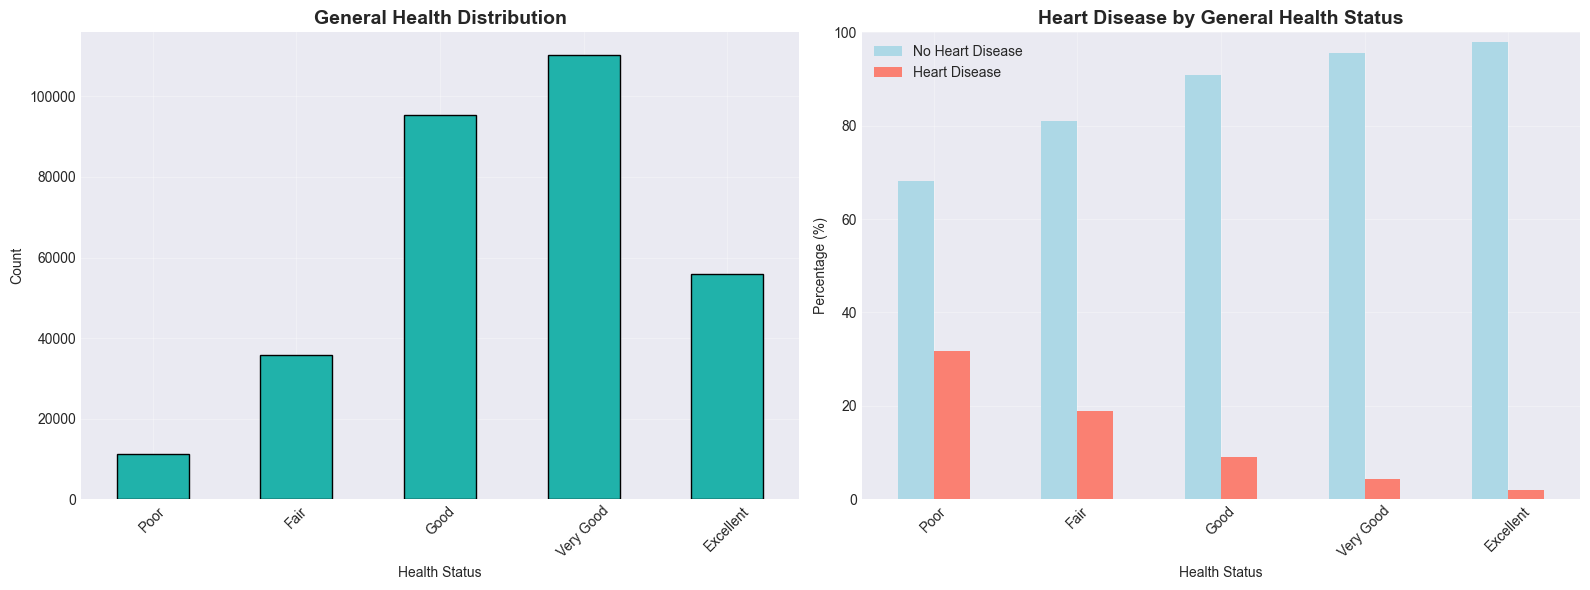

In [ ]:
# =============================================================================
# 13. GENERAL HEALTH STATUS ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("GENERAL HEALTH STATUS ANALYSIS")
print("="*80)

# CRITICAL FIX: Reload data to get original Heart_Disease values
df_temp = pd.read_csv(csv_path)

# Convert Heart_Disease to numeric
if df_temp['Heart_Disease'].dtype == 'object' or df_temp['Heart_Disease'].dtype.name == 'category':
    df['Heart_Disease'] = df_temp['Heart_Disease'].map({'No': 0, 'Yes': 1})

# Convert General_Health to string for proper filtering
if df['General_Health'].dtype.name == 'category':
    df['General_Health'] = df['General_Health'].astype(str)

health_dist = df['General_Health'].value_counts()
print("\nGeneral Health Distribution:")
for health, count in health_dist.items():
    print(f"  {health:15}: {count:,} ({count/len(df)*100:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Health distribution
health_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
health_dist_ordered = df['General_Health'].value_counts().reindex(health_order)
health_dist_ordered.plot(kind='bar', color='lightseagreen', edgecolor='black', ax=axes[0])
axes[0].set_title('General Health Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Health Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Health vs Heart Disease (ROBUST)
health_heart_data = []

print("\nHeart Disease Prevalence by General Health Status:")
print("="*60)

for health_status in health_order:
    health_subset = df[df['General_Health'] == health_status].copy()
    total = len(health_subset)
    
    if total > 0:
        hd_yes = (health_subset['Heart_Disease'] == 1).sum()
        hd_no = (health_subset['Heart_Disease'] == 0).sum()
        
        hd_yes_pct = (hd_yes / total) * 100
        hd_no_pct = (hd_no / total) * 100
        
        health_heart_data.append({
            'General_Health': health_status,
            'No Heart Disease': hd_no_pct,
            'Heart Disease': hd_yes_pct
        })
        
        print(f"  {health_status:15}: {hd_yes:,}/{total:,} = {hd_yes_pct:.1f}% have heart disease")

print("="*60)

health_heart_df = pd.DataFrame(health_heart_data)
health_heart_df.set_index('General_Health', inplace=True)

health_heart_df.plot(kind='bar', stacked=False, color=['lightblue', 'salmon'], ax=axes[1])
axes[1].set_title('Heart Disease by General Health Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Health Status')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(['No Heart Disease', 'Heart Disease'], loc='upper left')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()

## Chronic Diseases


CHRONIC DISEASES ANALYSIS

Chronic Disease Prevalence:
  Diabetes       : 40,171 (13.0%)
  Arthritis      : 101,071 (32.7%)
  Skin_Cancer    : 29,994 (9.7%)
  Other_Cancer   : 29,878 (9.7%)
  Depression     : 61,901 (20.0%)

Heart Disease Prevalence by Chronic Condition:

Diabetes:
  No : 15,705/259,141 = 6.1% have heart disease
  Yes: 8,376/40,171 = 20.9% have heart disease

Arthritis:
  No : 10,719/207,783 = 5.2% have heart disease
  Yes: 14,252/101,071 = 14.1% have heart disease

Skin_Cancer:
  No : 20,281/278,860 = 7.3% have heart disease
  Yes: 4,690/29,994 = 15.6% have heart disease

Other_Cancer:
  No : 20,256/278,976 = 7.3% have heart disease
  Yes: 4,715/29,878 = 15.8% have heart disease

Depression:
  No : 18,870/246,953 = 7.6% have heart disease
  Yes: 6,101/61,901 = 9.9% have heart disease


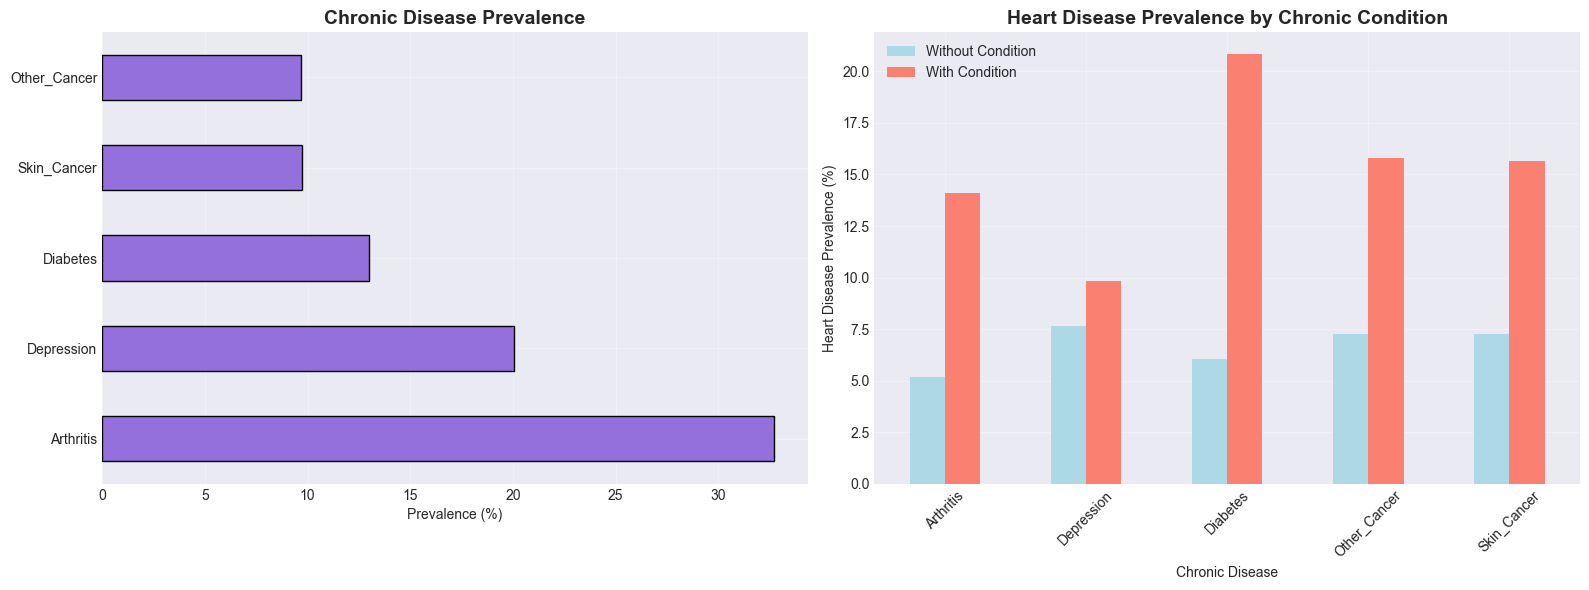

In [52]:
# =============================================================================
# 14. CHRONIC DISEASES ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("CHRONIC DISEASES ANALYSIS")
print("="*80)

# CRITICAL FIX: Reload data to get original Heart_Disease values
df_temp = pd.read_csv(csv_path)

# Convert Heart_Disease to numeric
if df_temp['Heart_Disease'].dtype == 'object' or df_temp['Heart_Disease'].dtype.name == 'category':
    df['Heart_Disease'] = df_temp['Heart_Disease'].map({'No': 0, 'Yes': 1})

chronic_diseases = ['Diabetes', 'Arthritis', 'Skin_Cancer', 'Other_Cancer', 'Depression']
available_diseases = [col for col in chronic_diseases if col in df.columns]

if available_diseases:
    print("\nChronic Disease Prevalence:")
    disease_prev = {}
    for disease in available_diseases:
        # Count 'Yes' responses
        prevalence = (df_temp[disease] == 'Yes').sum()
        pct = (prevalence / len(df)) * 100
        disease_prev[disease] = pct
        print(f"  {disease:15}: {prevalence:,} ({pct:.1f}%)")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Disease prevalence
    disease_prev_series = pd.Series(disease_prev).sort_values(ascending=False)
    disease_prev_series.plot(kind='barh', color='mediumpurple', edgecolor='black', ax=axes[0])
    axes[0].set_title('Chronic Disease Prevalence', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Prevalence (%)')
    axes[0].grid(True, alpha=0.3)
    
    # Heart disease by chronic conditions (ROBUST)
    chronic_heart_data = []
    
    print("\nHeart Disease Prevalence by Chronic Condition:")
    print("="*60)
    
    for disease in available_diseases:
        print(f"\n{disease}:")
        for status in ['No', 'Yes']:
            disease_mask = df_temp[disease] == status
            disease_subset = df[disease_mask].copy()
            total = len(disease_subset)
            
            if total > 0:
                hd_yes = (disease_subset['Heart_Disease'] == 1).sum()
                hd_pct = (hd_yes / total) * 100
                
                chronic_heart_data.append({
                    'Disease': disease,
                    'Status': status,
                    'Heart_Disease_Pct': hd_pct
                })
                
                print(f"  {status:3}: {hd_yes:,}/{total:,} = {hd_pct:.1f}% have heart disease")
    
    print("="*60)
    
    chronic_heart_df = pd.DataFrame(chronic_heart_data)
    chronic_pivot = chronic_heart_df.pivot(index='Disease', columns='Status', values='Heart_Disease_Pct')
    
    chronic_pivot.plot(kind='bar', color=['lightblue', 'salmon'], ax=axes[1])
    axes[1].set_title('Heart Disease Prevalence by Chronic Condition', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Chronic Disease')
    axes[1].set_ylabel('Heart Disease Prevalence (%)')
    axes[1].legend(['Without Condition', 'With Condition'], loc='upper left')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Lifestyle


LIFESTYLE FACTORS ANALYSIS

Smoking_History Distribution:
  No: 183,590 (59.4%)
  Yes: 125,264 (40.6%)

Heart Disease Prevalence by Smoking_History:
  Yes                 : 14,584/125,264 = 11.6% have heart disease
  No                  : 10,387/183,590 = 5.7% have heart disease

Exercise Distribution:
  Yes: 239,381 (77.5%)
  No: 69,473 (22.5%)

Heart Disease Prevalence by Exercise:
  No                  : 9,004/69,473 = 13.0% have heart disease
  Yes                 : 15,967/239,381 = 6.7% have heart disease


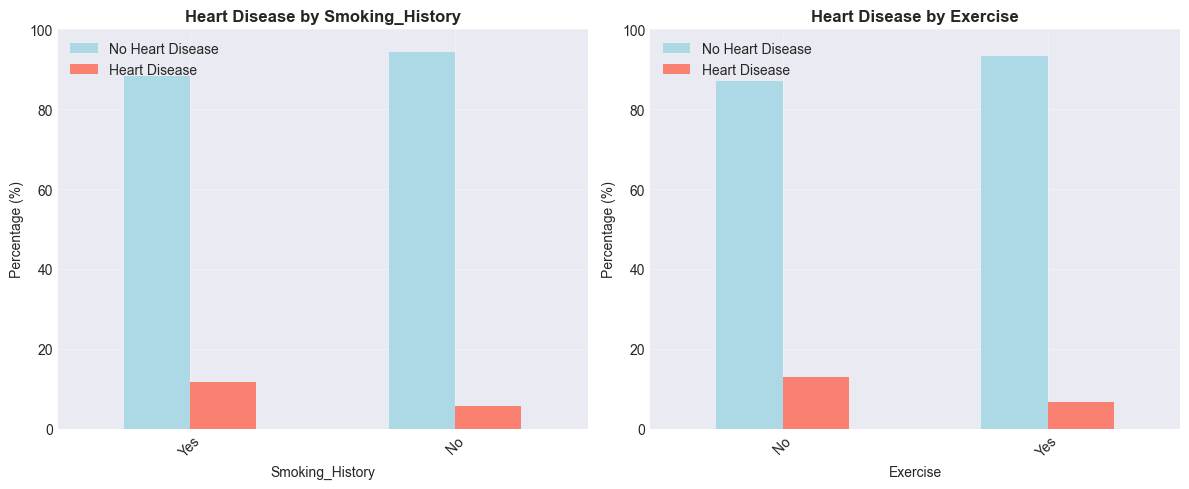

In [53]:
# =============================================================================
# 15. LIFESTYLE FACTORS ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("LIFESTYLE FACTORS ANALYSIS")
print("="*80)

# CRITICAL FIX: Reload data to get original Heart_Disease values
df_temp = pd.read_csv(csv_path)

# Convert Heart_Disease to numeric
if df_temp['Heart_Disease'].dtype == 'object' or df_temp['Heart_Disease'].dtype.name == 'category':
    df['Heart_Disease'] = df_temp['Heart_Disease'].map({'No': 0, 'Yes': 1})

lifestyle_factors = ['Smoking_History', 'Exercise']
available_lifestyle = [col for col in lifestyle_factors if col in df.columns]

if available_lifestyle:
    fig, axes = plt.subplots(1, len(available_lifestyle), figsize=(6*len(available_lifestyle), 5))
    if len(available_lifestyle) == 1:
        axes = [axes]
    
    for idx, factor in enumerate(available_lifestyle):
        print(f"\n{factor} Distribution:")
        factor_dist = df_temp[factor].value_counts()
        for val, count in factor_dist.items():
            print(f"  {val}: {count:,} ({count/len(df)*100:.1f}%)")
        
        # Heart disease by lifestyle factor (ROBUST)
        lifestyle_heart_data = []
        
        print(f"\nHeart Disease Prevalence by {factor}:")
        print("="*60)
        
        for status in df_temp[factor].unique():
            status_mask = df_temp[factor] == status
            status_subset = df[status_mask].copy()
            total = len(status_subset)
            
            if total > 0:
                hd_yes = (status_subset['Heart_Disease'] == 1).sum()
                hd_no = (status_subset['Heart_Disease'] == 0).sum()
                
                hd_yes_pct = (hd_yes / total) * 100
                hd_no_pct = (hd_no / total) * 100
                
                lifestyle_heart_data.append({
                    'Status': status,
                    'No Heart Disease': hd_no_pct,
                    'Heart Disease': hd_yes_pct
                })
                
                print(f"  {status:20}: {hd_yes:,}/{total:,} = {hd_yes_pct:.1f}% have heart disease")
        
        print("="*60)
        
        lifestyle_heart_df = pd.DataFrame(lifestyle_heart_data)
        lifestyle_heart_df.set_index('Status', inplace=True)
        
        lifestyle_heart_df.plot(kind='bar', stacked=False, color=['lightblue', 'salmon'], ax=axes[idx])
        axes[idx].set_title(f'Heart Disease by {factor}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(factor)
        axes[idx].set_ylabel('Percentage (%)')
        axes[idx].legend(['No Heart Disease', 'Heart Disease'], loc='upper left')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].set_ylim([0, 100])
    
    plt.tight_layout()
    plt.show()




ALCOHOL CONSUMPTION CATEGORIZATION

Alcohol Consumption Categories Distribution:
Alcohol_Category
None        140262
Light        95281
Moderate     16978
Heavy        56333
Unknown          0
Name: count, dtype: int64


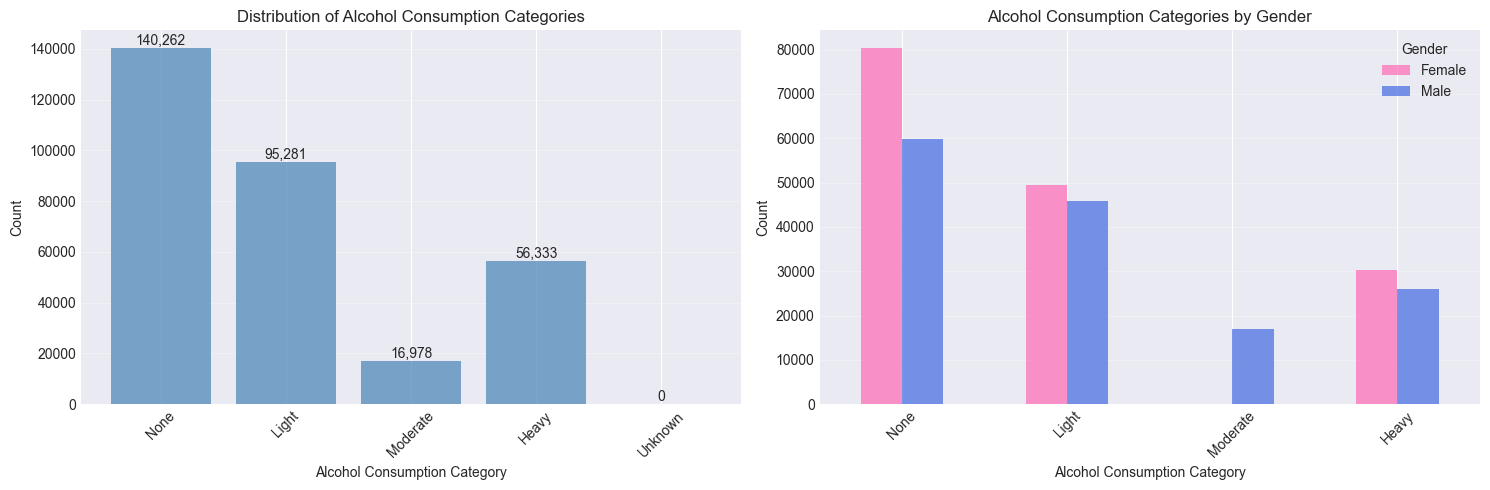


--------------------------------------------------------------------------------
Heart Disease Prevalence by Alcohol Consumption Category:
--------------------------------------------------------------------------------
  None           : 10.57%
  Light          : 6.07%
  Moderate       : 6.48%
  Heavy          : 5.80%


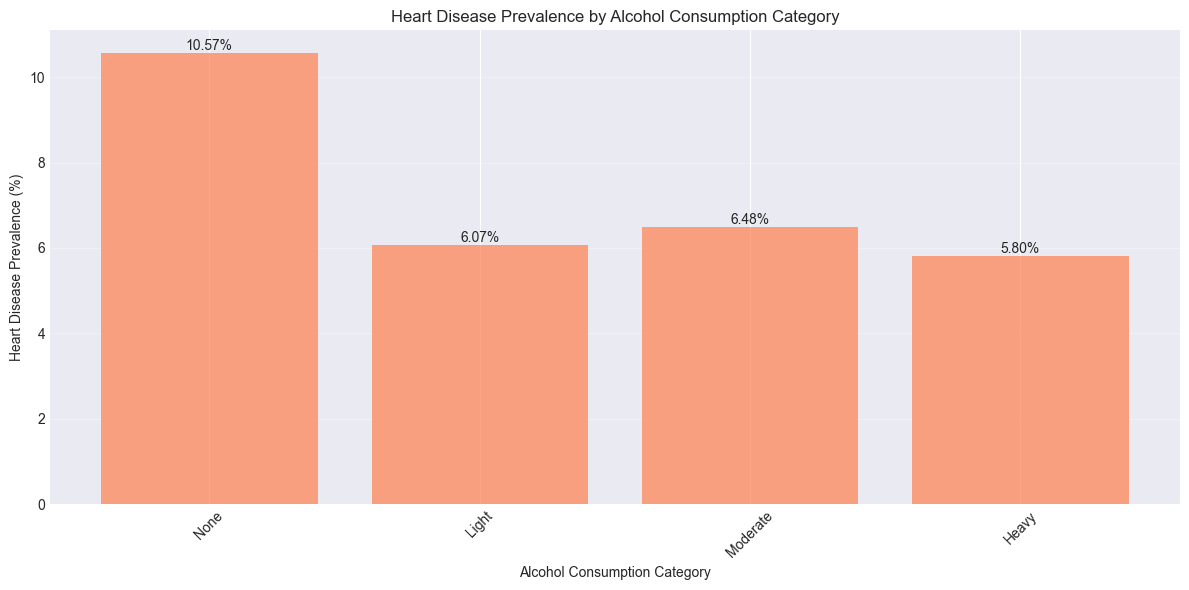

In [54]:
# Alcohol Consumption Categorization (CDC/BRFSS Guidelines)
print("\n" + "="*80)
print("ALCOHOL CONSUMPTION CATEGORIZATION")
print("="*80)

# Create a copy for categorization
df['Alcohol_Category'] = 'Unknown'

# Categorize based on CDC/BRFSS definitions
# For females: Heavy = 8+ drinks/week
# For males: Heavy = 15+ drinks/week

# None
df.loc[df['Alcohol_Consumption'] == 0, 'Alcohol_Category'] = 'None'

# Light (1-7 drinks/week for both genders)
df.loc[(df['Alcohol_Consumption'] > 0) & (df['Alcohol_Consumption'] <= 7), 'Alcohol_Category'] = 'Light'

# Moderate and Heavy - Gender specific
# Females
df.loc[(df['Sex'] == 'Female') & (df['Alcohol_Consumption'] > 7) & (df['Alcohol_Consumption'] < 8), 'Alcohol_Category'] = 'Moderate'
df.loc[(df['Sex'] == 'Female') & (df['Alcohol_Consumption'] >= 8), 'Alcohol_Category'] = 'Heavy'

# Males
df.loc[(df['Sex'] == 'Male') & (df['Alcohol_Consumption'] > 7) & (df['Alcohol_Consumption'] < 15), 'Alcohol_Category'] = 'Moderate'
df.loc[(df['Sex'] == 'Male') & (df['Alcohol_Consumption'] >= 15), 'Alcohol_Category'] = 'Heavy'

# Convert to categorical with proper order
df['Alcohol_Category'] = pd.Categorical(df['Alcohol_Category'], 
                                        categories=['None', 'Light', 'Moderate', 'Heavy', 'Unknown'],
                                        ordered=True)

print("\nAlcohol Consumption Categories Distribution:")
print(df['Alcohol_Category'].value_counts().sort_index())

# Visualization: Alcohol Categories by Gender
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Overall distribution
alcohol_counts = df['Alcohol_Category'].value_counts().sort_index()
axes[0].bar(range(len(alcohol_counts)), alcohol_counts.values, color='steelblue', alpha=0.7)
axes[0].set_xticks(range(len(alcohol_counts)))
axes[0].set_xticklabels(alcohol_counts.index, rotation=45)
axes[0].set_xlabel('Alcohol Consumption Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Alcohol Consumption Categories')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(alcohol_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Plot 2: By Gender
gender_alcohol = pd.crosstab(df['Alcohol_Category'], df['Sex'])
gender_alcohol.plot(kind='bar', ax=axes[1], color=['#FF69B4', '#4169E1'], alpha=0.7)
axes[1].set_xlabel('Alcohol Consumption Category')
axes[1].set_ylabel('Count')
axes[1].set_title('Alcohol Consumption Categories by Gender')
axes[1].legend(title='Gender')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Heart Disease prevalence by Alcohol Category
print("\n" + "-"*80)
print("Heart Disease Prevalence by Alcohol Consumption Category:")
print("-"*80)

categories = []
hd_prevalence = []

for cat in ['None', 'Light', 'Moderate', 'Heavy']:
    if cat in df['Alcohol_Category'].values:
        cat_data = df[df['Alcohol_Category'] == cat]
        if len(cat_data) > 0:
            # Convert to numeric for calculation
            hd_numeric = pd.to_numeric(cat_data['Heart_Disease'], errors='coerce')
            prevalence = (hd_numeric.sum() / len(cat_data)) * 100
            categories.append(cat)
            hd_prevalence.append(prevalence)
            print(f"  {cat:15}: {prevalence:.2f}%")

# Visualization: Heart Disease by Alcohol Category
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(range(len(categories)), hd_prevalence, color='coral', alpha=0.7)
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45)
ax.set_xlabel('Alcohol Consumption Category')
ax.set_ylabel('Heart Disease Prevalence (%)')
ax.set_title('Heart Disease Prevalence by Alcohol Consumption Category')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(hd_prevalence):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n" + "="*80)

## Checkup Frequency


CHECKUP FREQUENCY ANALYSIS

Checkup Frequency Distribution:
  Within the past year               : 239,371 (77.5%)
  Within the past 2 years            : 37,213 (12.0%)
  Within the past 5 years            : 17,442 (5.6%)
  5 or more years ago                : 13,421 (4.3%)
  Never                              : 1,407 (0.5%)

Heart Disease Prevalence by Checkup Frequency:
  Within the past year               : 22,635/239,371 = 9.5% have heart disease
  Within the past 2 years            : 1,465/37,213 = 3.9% have heart disease
  Within the past 5 years            : 471/17,442 = 2.7% have heart disease
  5 or more years ago                : 342/13,421 = 2.5% have heart disease
  Never                              : 58/1,407 = 4.1% have heart disease


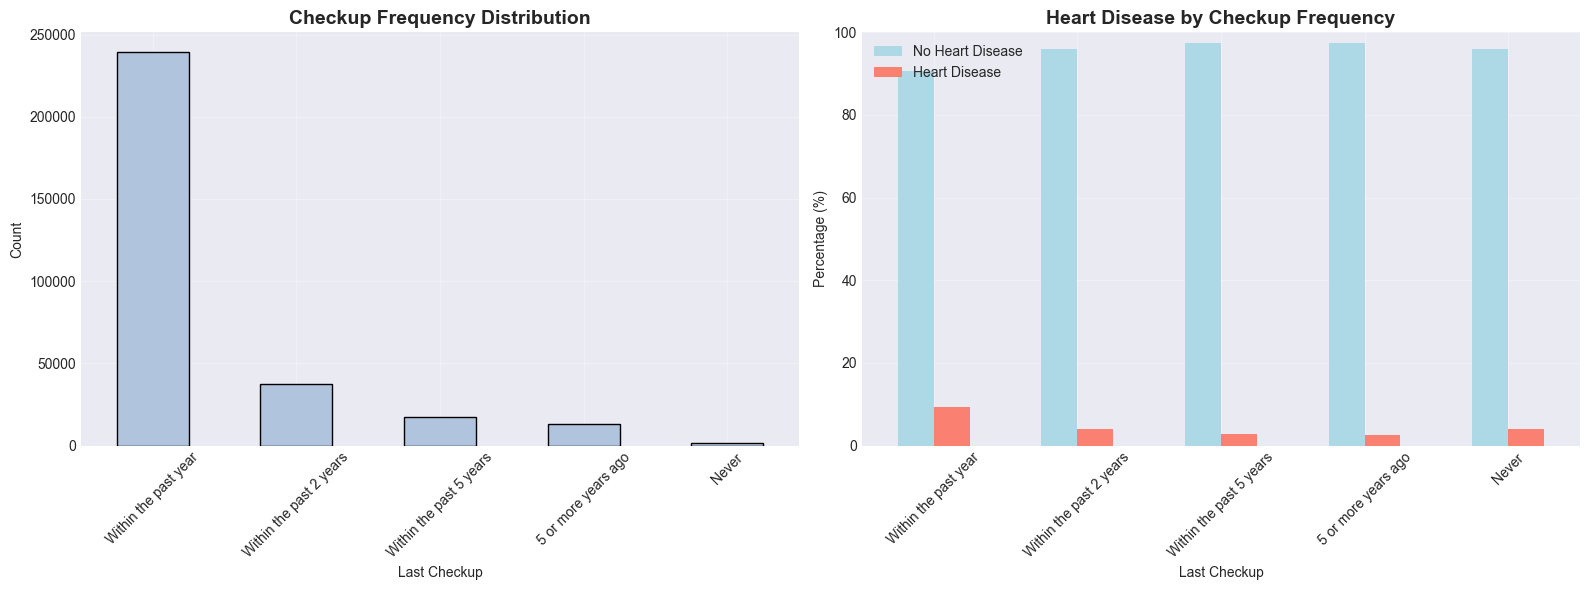

In [55]:
# =============================================================================
# 16. CHECKUP FREQUENCY ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("CHECKUP FREQUENCY ANALYSIS")
print("="*80)

# CRITICAL FIX: Reload data to get original Heart_Disease values
df_temp = pd.read_csv(csv_path)

# Convert Heart_Disease to numeric
if df_temp['Heart_Disease'].dtype == 'object' or df_temp['Heart_Disease'].dtype.name == 'category':
    df['Heart_Disease'] = df_temp['Heart_Disease'].map({'No': 0, 'Yes': 1})

checkup_dist = df_temp['Checkup'].value_counts()
print("\nCheckup Frequency Distribution:")
for checkup, count in checkup_dist.items():
    print(f"  {checkup:35}: {count:,} ({count/len(df)*100:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Checkup distribution
checkup_order = ['Within the past year', 'Within the past 2 years', 
                 'Within the past 5 years', '5 or more years ago', 'Never']
checkup_dist_ordered = df_temp['Checkup'].value_counts().reindex(checkup_order)
checkup_dist_ordered.plot(kind='bar', color='lightsteelblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Checkup Frequency Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Last Checkup')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Checkup vs Heart Disease (ROBUST)
checkup_heart_data = []

print("\nHeart Disease Prevalence by Checkup Frequency:")
print("="*60)

for checkup_status in checkup_order:
    checkup_mask = df_temp['Checkup'] == checkup_status
    checkup_subset = df[checkup_mask].copy()
    total = len(checkup_subset)
    
    if total > 0:
        hd_yes = (checkup_subset['Heart_Disease'] == 1).sum()
        hd_no = (checkup_subset['Heart_Disease'] == 0).sum()
        
        hd_yes_pct = (hd_yes / total) * 100
        hd_no_pct = (hd_no / total) * 100
        
        checkup_heart_data.append({
            'Checkup': checkup_status,
            'No Heart Disease': hd_no_pct,
            'Heart Disease': hd_yes_pct
        })
        
        print(f"  {checkup_status:35}: {hd_yes:,}/{total:,} = {hd_yes_pct:.1f}% have heart disease")

print("="*60)

checkup_heart_df = pd.DataFrame(checkup_heart_data)
checkup_heart_df.set_index('Checkup', inplace=True)

checkup_heart_df.plot(kind='bar', stacked=False, color=['lightblue', 'salmon'], ax=axes[1])
axes[1].set_title('Heart Disease by Checkup Frequency', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Last Checkup')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(['No Heart Disease', 'Heart Disease'], loc='upper left')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()

## Detailed Outlier Analysis


In [ ]:
# =============================================================================
# DETAILED OUTLIER ANALYSIS
# =============================================================================

print("\n\nDETAILED HEIGHT-WEIGHT OUTLIER ANALYSIS:")
print("="*60)

# Analyze outlier characteristics
outlier_df = df[outlier_mask][['height', 'weight', 'age_years', 'gender', 'cardio']].copy()
outlier_df['predicted_weight'] = y_pred[outlier_mask]
outlier_df['residual'] = residuals[outlier_mask]

print("\nTop 10 most extreme outliers:")
top_outliers = outlier_df.nlargest(10, 'residual')
display(top_outliers[['height', 'weight', 'predicted_weight', 'residual', 'age_years', 'gender']])

# Categorize outliers
print("\nOutlier Categories:")

# Underweight outliers (weight much lower than expected)
underweight_outliers = outlier_df[outlier_df['weight'] < outlier_df['predicted_weight']]
print(f"  • Underweight outliers: {len(underweight_outliers):,} ({len(underweight_outliers)/len(df)*100:.2f}%)")

# Overweight outliers (weight much higher than expected)
overweight_outliers = outlier_df[outlier_df['weight'] > outlier_df['predicted_weight']]
print(f"  • Overweight outliers: {len(overweight_outliers):,} ({len(overweight_outliers)/len(df)*100:.2f}%)")

# Extreme cases (residual > 50 kg)
extreme_outliers = outlier_df[outlier_df['residual'] > 50]
print(f"  • Extreme cases (>50kg deviation): {len(extreme_outliers):,} ({len(extreme_outliers)/len(df)*100:.2f}%)")



DETAILED HEIGHT-WEIGHT OUTLIER ANALYSIS:

Top 10 most extreme outliers:


,height,weight,predicted_weight,residual,age_years,gender
27384,80,178.0,30.976912,147.023088,42,1
12770,75,168.0,28.488117,139.511883,54,1
8171,97,170.0,39.438814,130.561186,48,2
23913,81,156.0,31.474671,124.525329,52,1
59625,104,165.0,42.923126,122.076874,48,1
20028,112,167.0,46.905198,120.094802,54,1
50413,180,200.0,80.752805,119.247195,41,2
435,186,200.0,83.739359,116.260641,46,1
45358,104,159.0,42.923126,116.076874,54,1
15366,125,167.0,53.376064,113.623936,48,1



Outlier Categories:
  • Underweight outliers: 20,868 (29.81%)
  • Overweight outliers: 17,007 (24.30%)
  • Extreme cases (>50kg deviation): 401 (0.57%)


## Combined Outlier Summary

In [ ]:
# =============================================================================
# COMBINED OUTLIER SUMMARY
# =============================================================================

print("\n\nCOMBINED OUTLIER SUMMARY (ALL METHODS):")
print("="*80)

outlier_summary_data = []

for var in important_vars[:5]:
    row = {
        'Variable': var,
        'Plausibility': len(plausibility_outliers.get(var, [])),
        'IQR': len(iqr_outliers.get(var, [])),
        'Z-Score': len(zscore_outliers.get(var, []))
    }
    outlier_summary_data.append(row)

# Add RANSAC and multivariate
if 'Height_(cm)' in df.columns and 'Weight_(kg)' in df.columns:
    outlier_summary_data.append({
        'Variable': 'Height-Weight (RANSAC)',
        'Plausibility': n_outliers_ransac,
        'IQR': '-',
        'Z-Score': '-'
    })

outlier_summary_data.append({
    'Variable': 'Multivariate (Isolation Forest)',
    'Plausibility': n_outliers,
    'IQR': '-',
    'Z-Score': '-'
})

outlier_summary_df = pd.DataFrame(outlier_summary_data)
display(outlier_summary_df)



COMBINED OUTLIER SUMMARY (ALL METHODS):


,Variable,Plausibility,IQR,Z-Score
0,age_years,0,4,4
1,height,0,519,293
2,weight,0,1819,702
3,ap_hi,227,1435,38
4,ap_lo,1006,4632,951
5,Multivariate (Isolation Forest),3500,-,-
